Regression Models

Supervised Learning merupakan suatu teknik pembelajaran yang didalam keseluruhan proses pembelajarannya, dibimbing atau di-supervisi. Tujuan utamanya adalah untuk memprediksi hasil yang diberikan serangkaian training samples bersama dengan training labels.

Sedangkan regression adalah bentuk lain dari supervised learning. Regression berguna saat memprediksi masalah berbasis angka seperti harga pasar saham, suhu untuk hari tertentu, atau probabilitas suatu peristiwa.

# Simple Linear Regression with Scikit-Learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
print(x)
print("X Shape :",x.shape)

y = np.array([5, 20, 14, 32, 22, 38])
print(y)
print("y Shape :",y.shape)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
X Shape : (6, 1)
[ 5 20 14 32 22 38]
y Shape : (6,)


In [3]:
model = LinearRegression()

In [4]:
model.fit(x, y)

LinearRegression()

In [5]:
model = LinearRegression().fit(x, y)

In [6]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.715875613747954


In [7]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [8]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


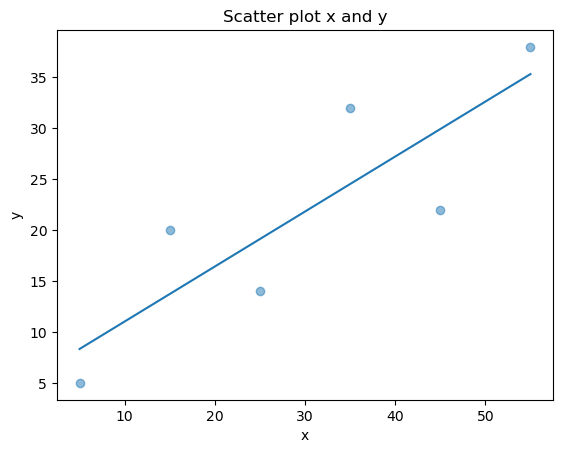

In [9]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
y_pred =  model.coef_ * x + model.intercept_ 
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


# Multiple Linear Regression with Scikit-Learn

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [12]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [13]:
model = LinearRegression().fit(x, y)

In [14]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [15]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [16]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


# Polynomial Regression with Scikit-Learn

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


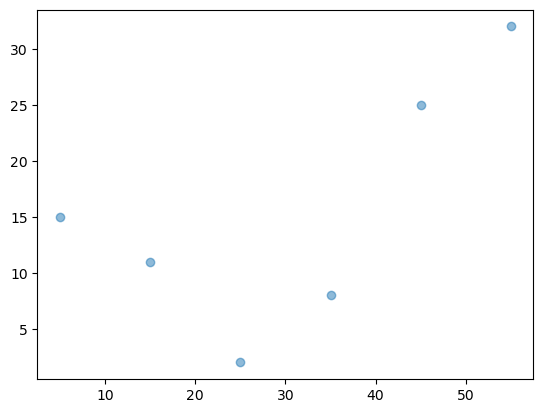

In [19]:
plt.scatter(x, y, alpha=0.5)

In [20]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [21]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [22]:
x_ = transformer.transform(x)
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [23]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [24]:
model = LinearRegression().fit(x_, y)

In [25]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [27]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [28]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [29]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498565
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]


In [30]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [31]:
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


# Advanced Linear Regression with StatsModels

In [32]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import statsmodels.api as sm

In [34]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [35]:
x = sm.add_constant(x)

In [36]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [37]:
model = sm.OLS(y, x)

In [38]:
results = model.fit()

In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 10 May 2023   Prob (F-statistic):            0.00713
Time:                        19:45:09   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\sapphire\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756777
adjusted coefficient of determination: 0.8062314962259488
regression coefficients: [5.52257928 0.44706965 0.25502548]


In [41]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [42]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# Latihan

## Linear Regression with Statsmodels

In [43]:
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd 

In [50]:
df = pd.read_csv('boston_housing.csv')

In [51]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [53]:
x = df.drop('MEDV',axis=1)
y = df['MEDV']

In [54]:
x=x[['RM']]
model = sm.OLS(y,x)
results = model.fit()
predictions = results.predict(x)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 10 May 2023   Prob (F-statistic):                   3.74e-256
Time:                        20:02:27   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

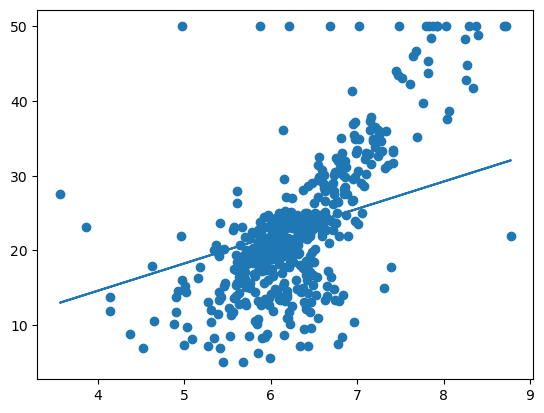

In [55]:
plt.scatter(x,y)
plt.plot(x,predictions)

## Linear Regression with Sklearn

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [61]:
df.shape

(205, 2)

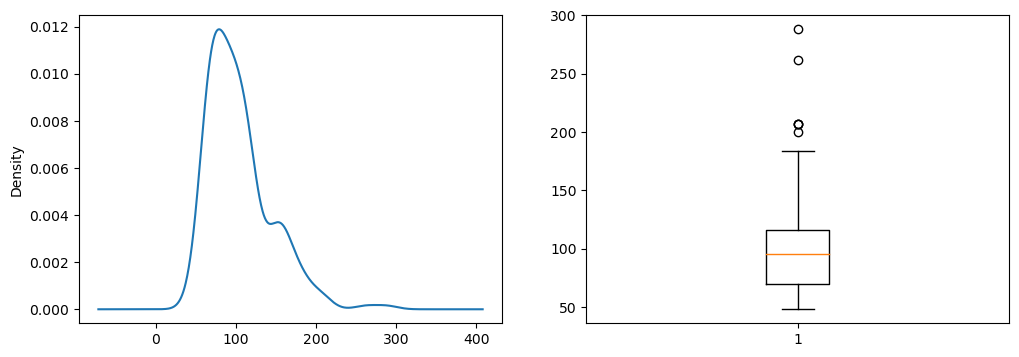

In [62]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

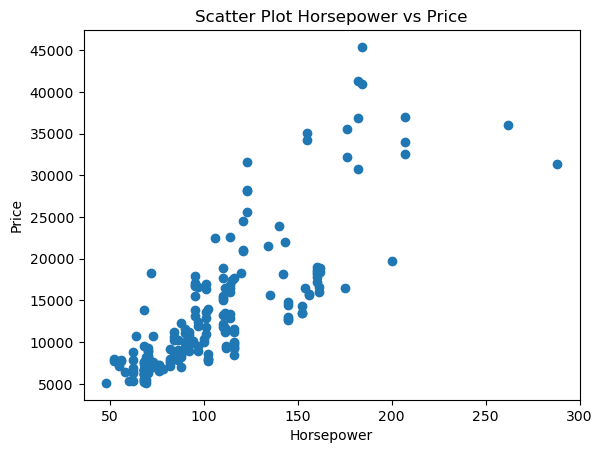

In [63]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [64]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [65]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [66]:
print(x)
print(y)

[[111]
 [111]
 [154]
 [102]
 [115]
 [110]
 [110]
 [110]
 [140]
 [160]
 [101]
 [101]
 [121]
 [121]
 [121]
 [182]
 [182]
 [182]
 [ 48]
 [ 70]
 [ 70]
 [ 68]
 [ 68]
 [102]
 [ 68]
 [ 68]
 [ 68]
 [102]
 [ 88]
 [145]
 [ 58]
 [ 76]
 [ 60]
 [ 76]
 [ 76]
 [ 76]
 [ 76]
 [ 86]
 [ 86]
 [ 86]
 [ 86]
 [101]
 [100]
 [ 78]
 [ 70]
 [ 70]
 [ 90]
 [176]
 [176]
 [262]
 [ 68]
 [ 68]
 [ 68]
 [ 68]
 [ 68]
 [101]
 [101]
 [101]
 [135]
 [ 84]
 [ 84]
 [ 84]
 [ 84]
 [ 64]
 [ 84]
 [120]
 [ 72]
 [123]
 [123]
 [123]
 [123]
 [155]
 [155]
 [184]
 [184]
 [175]
 [ 68]
 [ 68]
 [ 68]
 [102]
 [116]
 [ 88]
 [145]
 [145]
 [145]
 [ 88]
 [ 88]
 [116]
 [116]
 [ 69]
 [ 55]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 97]
 [ 97]
 [152]
 [152]
 [152]
 [160]
 [200]
 [160]
 [ 97]
 [ 95]
 [ 97]
 [ 95]
 [ 95]
 [ 95]
 [ 95]
 [ 95]
 [ 97]
 [ 95]
 [142]
 [ 68]
 [102]
 [ 68]
 [ 68]
 [ 68]
 [ 88]
 [145]
 [143]
 [207]
 [207]
 [207]
 [288]
 [ 90]
 [ 90]
 [110]
 [110]
 [110]
 [110]
 [160]
 [160]
 [ 69]
 [ 73]
 [ 73]
 [ 82]
 [ 82]

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [68]:
x_train.shape

(164, 1)

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [70]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[159.46350411]]
[-3418.81916897]


In [71]:
lin_reg.score(x_test, y_test)

0.5770480931004249

Text(0.5, 1.0, 'Plot Horsepower vs Price')

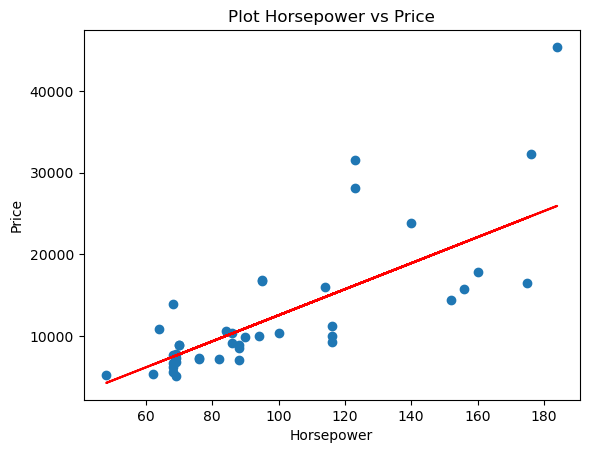

In [72]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [73]:
lin_reg.predict([[115]])

array([[14919.48380344]])

In [74]:
lin_reg.predict([[102]])

array([[12846.45825004]])

In [75]:
lin_reg.predict([[150]])

array([[20500.70644722]])

In [76]:
lin_reg.predict([[200]])

array([[28473.88165262]])

## Linier Regression Multiple Variables

In [78]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [79]:
url = "https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/hargarumah.csv"
df = pd.read_csv(url) 
df 

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [80]:
df.bedrooms.median()

4.0

In [81]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [82]:
reg = linear_model.LinearRegression()
x = df.drop('price',axis='columns')
y = df.price
reg.fit(x,y)

LinearRegression()

In [83]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [84]:
reg.intercept_

221323.00186540408